<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 


In [10]:
df = pd.read_csv("/Users/lucahummer/Desktop/Anaconda_python/tutorial/mdst_tutorials/data/states_edu.csv")



Chosen test: Math scores for Grade 4



<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [13]:
df.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [14]:
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)


In [ ]:
df.dropna(subset=['GRADES_4_G'], inplace=True)


In [15]:
df.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN


<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [19]:
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['GRADES_4_G']
df.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,INSTRUCTION_EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,25.569528
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,25.903487
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,27.844854
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,34.317171
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,32.429040


Final feature list: **< created an INSTRUCTION_EXPENDITURE_PER_STUDENT variable applied to 4th graders>**


Feature selection justification: **< so I can more accurately test how the amount a state spends on a students instruction relates to their proficiency in the MATH. exam>**


<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, 'Distribution of 4th grade math scores')

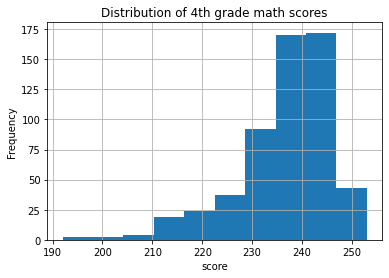

In [17]:
df.AVG_MATH_4_SCORE.hist()
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of 4th grade math scores')


** This is a showing the distibution of mean math scores of 4th graders showing that the average score from the whole dataframe is around 235-240**


Visualization 2

Text(0.5, 1.0, 'instruction expendeture per student vs average math score')

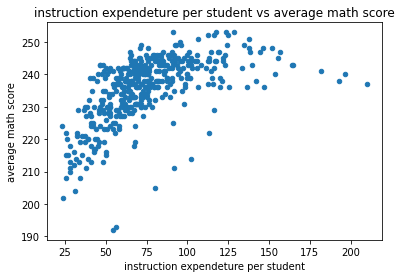

In [18]:
df.plot.scatter(x= 'INSTRUCTION_EXPENDITURE_PER_STUDENT', y= 'AVG_MATH_4_SCORE')
plt.xlabel('instruction expendeture per student')
plt.ylabel('average math score')
plt.title('instruction expendeture per student vs average math score')


**this showd the relation between average instruction expendeture per student and their average scores in the math section. By looking at this graph I can determine there is a positive correlation between the two variables, but how strong is that correlation?**



<h2> Data Creation </h2>

_Use this space to create train/test data_

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
X = df[['GRADES_4_G','INSTRUCTION_EXPENDITURE_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.4, random_state=0)


<h2> Prediction </h2>

Chosen ML task: **< REGRESSION>**


In [27]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression


In [28]:
# create your model here
model = LinearRegression()


In [29]:
model.fit(X_train, y_train)


LinearRegression()

In [30]:
y_pred = model.predict(X_test)


In [31]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)


ValueError: plot_confusion_matrix only supports classifiers

Text(0, 0.5, '4th MATH score')

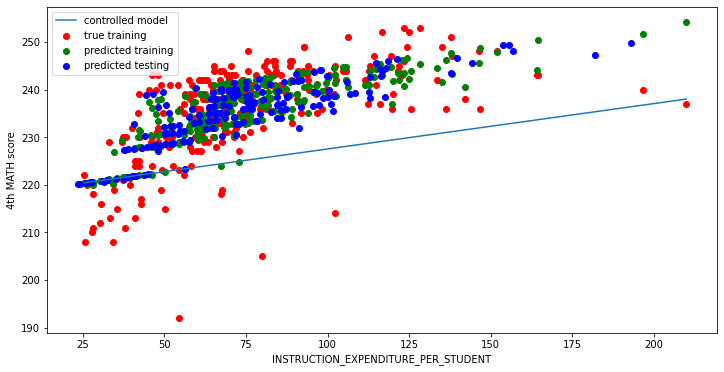

In [32]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('4th MATH score')


In [33]:
np.mean(np.abs(model.predict(X_test)-y_test))

5.2832257197661185

In [34]:
np.mean(model.predict(X_test)-y_test)

0.07934963664390114

In [35]:
print(model.intercept_)
print(model.coef_)

-1233.341159183401
[-2.61740772e-06  9.52992732e-02  7.28607425e-01]


In [36]:
model.score(X_test, y_test)

0.5632069049466942

In [37]:
np.mean((model.predict(X_test)-y_test)**2)**0.5

6.888553073593699

<h2> Summary </h2>

**<First I decided to work with the 4th grade math scores and try to see how the average expenditure on instruction per student correlates to the average math score for 4th graders. First I went through and removed the rows with no data in the avg math score for 4th graders and for number of 4th graders enrolled. Then I made a new variable called 'INSTRUCTION_EXPENDITURE_PER_STUDENT' and used that to create a regression model. The results of the regression model and scatterplot I made beforehand show that there is a poitive correlation between the two but after running the linear regression model and getting a very low r squared value and a high error value its clear the data being used needs to be tweaked and the correlation is not as trong as I once thought when only looking at the scatterplot.\>**
